<img src='../img/header.jpg' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<hr>

# 03 - Practical exercise - Solution - Mediterranean

## About

> In this exercise, you will visualise seasonal Level 3 NO<sub>2</sub> data from Sentinel-5P to look at seasonal variations in NO<sub>2</sub> in the Mediterranean Sea from shipping emissions. 
> 
> In a second step, you will compare these with Pandora measurements from three stations: (i) Athens, (ii) Thessaloniki and (iii) Rome. The station time-series information will further give you more insights on seasonal and diurnal NO<sub>2</sub> patterns in the Mediterranean.


## Tasks

### 1. Brainstorm &#11088;
  * What is the difference between Level 2 and Level 3 satellite data?
  * Why do you think the Pandora stations in Athens, Rome and Thessaloniki were selected for this exercise?
  * Can you think of any other sources of NO<sub>2</sub> that may hide the signal from the shipping lane pollution at the Pandora stations?

### 2. Download the seasonal Sentinel-5P Level 3 Data
  * &#128073; Download the seasonal data for summer 2022 and winter 2022-2023. Processing Sentinel-5P Level 3 data is available from the [Copernicus Sentinel-5P Mapping Portal](https://maps.s5p-pal.com) (direct download links: [Summer](https://maps.s5p-pal.com/download/grids/s5p-l3-tropno2-001-season-20220601-20220831-20230602.nc), [Winter](https://maps.s5p-pal.com/download/grids/s5p-l3-tropno2-001-season-20221201-20230228-20230309.nc))
  * &#128073; **Note:** Seasons are defined as:
      * Summer: June, July, August 
      * Winter: December, January, February 
  * &#128073; **Hint:** Modify the [download code](../01_introduction/01_datasets/03_ground-based_measurements/31_Pandonia_NO2_TXT.ipynb) for the Pandora data using the download URLs and file names for the Sentinel-5P data.

### 3. Visualise the Sentinel-5P Level 3 Data for Summer and Winter
  * &#128073; Plot one figure each for summer and winter.

### 4. Download the data from Athens, Rome-IIA and Thessaloniki
  * &#128073; PGN data are available for download via the [PDN web interface](https://data.pandonia-global-network.org/).

### 5. Plot the data for the three Pandora stations in a single plot
  * &#128073; Filter the data to a week in summer 1-7 June 2023 and one week in winter (1-7 December 2022) and create two plots comparing the three stations for one week in summer and one week in winter
  * &#128073; **Hint**: Add a legend if you like with this code snippet: `plt.legend(fontsize=16, loc=0)`

### 6. Interpret the plotting results.  &#127775;
  * Can you make a statement about the seasonal variations in NO<sub>2</sub> based on the Sentinel-5P data?
  * What do you observe about the diurnal cycle of NO<sub>2</sub> from the three Pandora stations?

## Module outline
* [1 - Brainstorm](#brainstorm_med)
* [2 - Download the seasonal Sentinel-5P Level 3 Data](#download_s5p)
* [3 - Visualise Sentinel-5P Level 3 data for summer and winter](#visualise_s5p)
* [4 - Download Pandora data from Athens, Rome and Thessaloniki](#download_pandora)
* [5 - Plot the data for the three Pandora stations in a single plot](#visualise_pandora)
* [6 - Interpret the plotting results](#interpret_med)


<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd
from datetime import datetime
import requests
import shutil

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='brainstorm_med'></a>1. Brainstorm &#11088;

  * What is the difference between Level 2 and Level 3 satellite data?
  * Why do you think the Pandora stations in Athens, Rome and Thessaloniki were selected for this exercise?
  * Can you think of any other sources of NO<sub>2</sub> that may hide the signal from the shipping lane pollution at the Pandora stations?

## <a id='download_s5p'></a>2. Download the seasonal Sentinel-5P Level 3 data

  * **Hint:** Modify the [download code]($$$) with the `requests` Python library for the Pandora data using the download URLs and file names for the Sentinel-5P data.

First, download the the Sentinel-5P Level 3 data for summer 2022 with the help of the `requests` library.

In [24]:
summer_url = 'https://maps.s5p-pal.com/download/grids/s5p-l3-tropno2-001-season-20220601-20220831-20230602.nc'
response = requests.get(summer_url, stream=True)

with open('./s5p-l3-tropno2-001-season-20220601-20220831-20230602.nc', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The summer S5P file was saved successfully')

The summer S5P file was saved successfully


Next, download the the Sentinel-5P Level 3 data for winter 2022/2023 with the help of the `requests` library.

In [23]:
winter_url = 'https://maps.s5p-pal.com/download/grids/s5p-l3-tropno2-001-season-20221201-20230228-20230309.nc'
response = requests.get(winter_url, stream=True)

with open('./s5p-l3-tropno2-001-season-20221201-20230228-20230309.nc', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The winter S5P file was saved successfully')

The winter S5P file was saved successfully


<br>

## <a id='visualise_s5p'></a>3. Visualise Sentinel-5P Level 3 Data for Summer and Winter

In a next step, you want to open the two data files with the xarray function `open_dataset()` and call them `s5p_summer` and `s5p_winter` respectively.

In [6]:
s5p_summer = xr.open_dataset('./s5p-l3-tropno2-001-season-20220601-20220831-20230602.nc')
s5p_winter = xr.open_dataset('./s5p-l3-tropno2-001-season-20221201-20230228-20230309.nc')

s5p_summer, s5p_winter

(<xarray.Dataset>
 Dimensions:                                 (time: 1, latitude: 8192, longitude: 16384)
 Coordinates:
   * latitude                                (latitude) float64 -89.99 ... 89.99
   * longitude                               (longitude) float64 -180.0 ... 180.0
 Dimensions without coordinates: time
 Data variables:
     datetime_start                          (time) datetime64[ns] ...
     tropospheric_NO2_column_number_density  (time, latitude, longitude) float32 ...
     datetime_stop                           (time) datetime64[ns] ...
     count                                   (time) int32 ...
     weight                                  (time, latitude, longitude) float32 ...
 Attributes:
     Conventions:     HARP-1.0
     datetime_start:  8187.03849824074
     datetime_stop:   8279.05122542824
     history:         2022-06-11T04:27:15Z [harp-1.14] harpmerge -a 'troposphe...,
 <xarray.Dataset>
 Dimensions:                                 (time: 1, latitude:

In a next step, you can then extract the NO<sub>2</sub> variable as `xarray.DataArray` from both datasets.

In [7]:
s5p_no2_summer = s5p_summer['tropospheric_NO2_column_number_density']
s5p_no2_winter = s5p_winter['tropospheric_NO2_column_number_density']

s5p_no2_summer, s5p_no2_winter

(<xarray.DataArray 'tropospheric_NO2_column_number_density' (time: 1, latitude: 8192, longitude: 16384)>
 [134217728 values with dtype=float32]
 Coordinates:
   * latitude   (latitude) float64 -89.99 -89.97 -89.95 ... 89.95 89.97 89.99
   * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
 Dimensions without coordinates: time
 Attributes:
     description:  tropospheric vertical column of NO2
     units:        umol/m2,
 <xarray.DataArray 'tropospheric_NO2_column_number_density' (time: 1, latitude: 8192, longitude: 16384)>
 [134217728 values with dtype=float32]
 Coordinates:
   * latitude   (latitude) float64 -89.99 -89.97 -89.95 ... 89.95 89.97 89.99
   * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
 Dimensions without coordinates: time
 Attributes:
     description:  tropospheric vertical column of NO2
     units:        umol/m2)

Above, you see that the data downloaded are global datasets. Hence, the next step is to create a geographical subset for the Mediterranean region. You can use the function `generate_geographical_subset` to create a geographical subregion for the following bounding box: `[latmin=34, latmax=45, lonmin=-1, lonmax=30]`.

In [10]:
latmin = 34.
latmax = 45.
lonmin = -1.
lonmax = 30.

In [11]:
s5p_no2_summer_subset = generate_geographical_subset(xarray=s5p_no2_summer, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)

s5p_no2_winter_subset = generate_geographical_subset(xarray=s5p_no2_winter, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)

s5p_no2_summer_subset

<xarray.DataArray 'tropospheric_NO2_column_number_density' (time: 1, latitude: 501, longitude: 1411)>
array([[[12.460122 , 12.5271635, 13.129312 , ..., 16.788036 ,
         16.168982 , 16.355398 ],
        [12.476791 , 12.660686 , 13.298058 , ..., 17.180002 ,
         16.706863 , 16.39527  ],
        [13.189123 , 12.877917 , 12.915206 , ..., 16.890923 ,
         16.59902  , 16.08662  ],
        ...,
        [25.72738  , 26.476217 , 26.16935  , ..., 20.352734 ,
         19.5474   , 19.355585 ],
        [25.865505 , 25.53406  , 26.235346 , ..., 19.988888 ,
         19.408628 , 19.284687 ],
        [23.709538 , 24.023746 , 24.444494 , ..., 19.621748 ,
         18.969442 , 18.998064 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 34.0 34.02 34.05 34.07 ... 44.95 44.97 44.99
  * longitude  (longitude) float64 -0.9998 -0.9778 -0.9558 ... 29.94 29.96 29.98
Dimensions without coordinates: time
Attributes:
    description:  tropospheric vertical column of NO2
    units:        umol/m2

In the last step of this task, you can now visualize the tropospheric vertical column of NO<sub>2</sub> during summer 2022 and winter 2022/2023. You can use the function `visualize_pcolormesh` to visualise the two data arrays.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'tropospheric vertical column of NO2 - Summer 2022'}>)

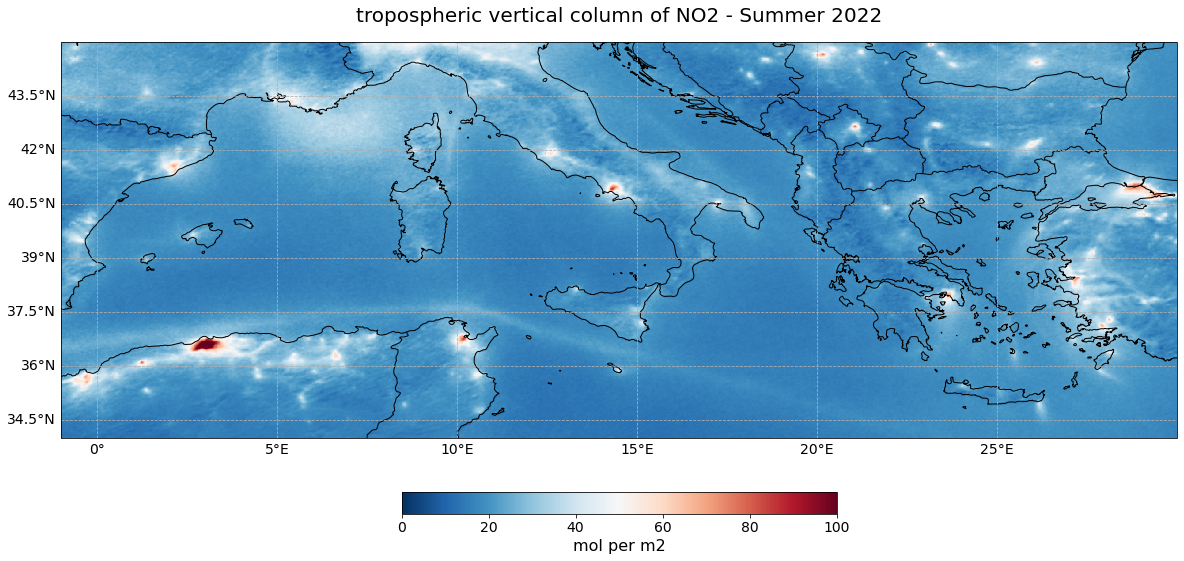

In [13]:
visualize_pcolormesh(data_array=s5p_no2_summer_subset[0,:,:], 
                     longitude=s5p_no2_summer_subset.longitude, 
                     latitude=s5p_no2_summer_subset.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='RdBu_r', 
                     unit='mol per m2', 
                     long_name=s5p_no2_summer.description + ' - ' + 'Summer 2022', 
                     vmin=0, 
                     vmax=100, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'tropospheric vertical column of NO2 - Winter 2022-2023'}>)

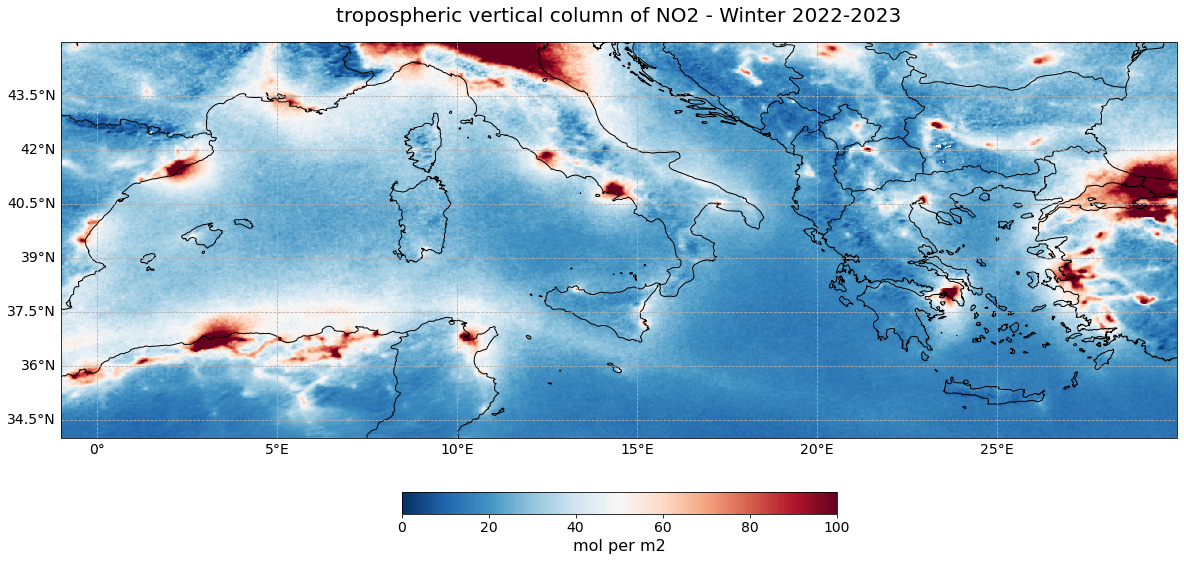

In [14]:
visualize_pcolormesh(data_array=s5p_no2_winter_subset[0,:,:], 
                     longitude=s5p_no2_winter_subset.longitude, 
                     latitude=s5p_no2_winter_subset.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='RdBu_r', 
                     unit='mol per m2', 
                     long_name=s5p_no2_winter.description + ' - ' + 'Winter 2022-2023', 
                     vmin=0, 
                     vmax=100, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


<br>

## <a id='download_pandora'></a>4.  Download Pandora data from Athens, Rome IIA and Thessaloniki

Pandora data are available for download via the [PGN web interface](https://data.pandonia-global-network.org/). The stations in the Mediterranean with larger ports are `Athens`, `Thessaloniki` and `Rome`.

First, let us download the Pandora NO<sub>2</sub> measurements for the station `Athens-NOA`.


In [3]:
athens_url = 'https://data.pandonia-global-network.org/Athens-NOA/Pandora119s1/L2/Pandora119s1_Athens-NOA_L2_rnvs3p1-8.txt'
response = requests.get(athens_url, stream=True)

with open('./Pandora119s1_Athens-NOA_L2_rnvs3p1-8.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The Athens file was saved successfully')

The Athens file was saved successfully


Next, download the NO<sub>2</sub> measurements from the station `Rome-IIA`.

In [4]:
rome_url = 'https://data.pandonia-global-network.org/Rome-IIA/Pandora138s1/L2/Pandora138s1_Rome-IIA_L2_rnvs3p1-8.txt'
response = requests.get(rome_url, stream=True)

with open('./Pandora138s1_Rome-IIA_L2_rnvs3p1-8.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The Rome-IIA file was saved successfully')

The Rome-IIA file was saved successfully


Last, download the NO<sub>2</sub> measurements from the station `Thessaloniki`.

In [5]:
thessaloniki_url = 'https://data.pandonia-global-network.org/Thessaloniki/Pandora240s1/L2/Pandora240s1_Thessaloniki_L2_rnvs3p1-8.txt'
response = requests.get(thessaloniki_url, stream=True)

with open('./Pandora240s1_Thessaloniki_L2_rnvs3p1-8.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The Thessaloniki file was saved successfully')

The Thessaloniki file was saved successfully


<br>

## <a id='visualise_pandora'></a>5. Plot the data for the three Pandora stations in a single plot

First, define the file paths for the data you downloaded.

In [6]:
athens_filepath = './Pandora119s1_Athens-NOA_L2_rnvs3p1-8.txt'
rome_filepath = './Pandora138s1_Rome-IIA_L2_rnvs3p1-8.txt'
thessaloniki_filepath = './Pandora240s1_Thessaloniki_L2_rnvs3p1-8.txt'

Next, prepare the measurements from the Athens-NOA station. The preparation steps include:
* Read the txt file as `pandas.DataFrame`
* Set the first column with DateTime information as index and convert it to a `DateTime` object
* Filter out unsucessful measurements and only keep measurements of high- and medium-quality.
* Filter by dates for one week in summer (1-7 June 2023) and one week in winter (1-7 December 2022)
* Select the columns with the NO<sub>2</sub> measurements as well as the errorbar information.

1. Read the txt file as `pandas.DataFrame`:

In [10]:
df = pd.read_csv(athens_filepath, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)
df

0            1      2      3       4      5       6   \
0       20160608T071251.0Z  6003.300590  31.96  43.35   96.22  82.81   75.38   
1       20160608T071808.4Z  6003.304263  32.71  42.32   97.16  81.84   76.13   
2       20160608T072331.1Z  6003.307999  32.20  41.27   98.15  80.84   76.89   
3       20160608T072844.1Z  6003.311622  32.21  40.25   99.13  79.88   77.63   
4       20160608T073413.8Z  6003.315438  31.62  39.18  100.19  78.86   78.41   
...                    ...          ...    ...    ...     ...    ...     ...   
794235  20230920T154418.8Z  8663.655773  11.54  82.67  265.54  65.31  201.48   
794236  20230920T154430.4Z  8663.655907  11.56  82.71  265.57  65.33  201.53   
794237  20230920T155527.7Z  8663.663515  30.37  84.86  267.27  66.17  204.05   
794238  20230920T160821.1Z  8663.672466  48.71  87.40  269.26  67.26  206.94   
794239  20230920T161509.5Z  8663.677193  46.91  88.75  270.30  67.88  208.44   

              7         8         9   ...      44   45     46   47     48  \
0       0.001105  0.001094  0.000816  ...  229.78 -2.0   2.12 -2.0   2.12   
1       0.000864  0.000858  0.000692  ...  229.78 -2.0   2.12 -2.0   2.12   
2       0.000915  0.000915  0.000733  ...  229.78 -2.0   2.12 -2.0   2.12   
3       0.001081  0.001111  0.000663  ...  229.78 -2.0   2.12 -2.0   2.12   
4       0.000831  0.000829  0.000684  ...  229.79 -2.0   2.12 -2.0   2.12   
...          ...       ...       ...  ...     ...  ...    ...  ...    ...   
794235  0.001255  0.001041  0.000295  ...  282.14 -2.0  17.89 -2.0  17.89   
794236  0.001244  0.001037  0.000299  ...  282.16 -2.0  17.90 -2.0  17.90   
794237  0.002233  0.001559  0.000388  ...  281.31 -2.0  17.60 -2.0  17.60   
794238  3.242000  1.810000  0.001758  ...  229.00 -2.0   2.12 -2.0   2.12   
794239  0.047900  0.036430  0.007107  ...  278.60 -2.0  16.67 -2.0  16.67   

            49     50   51        52        53  
0        1.370  0.000  0.0  0.000046  0.000005  
1        1.347  0.000  0.0  0.000047  0.000005  
2        1.326  0.000  0.0  0.000047  0.000005  
3        1.306  0.000  0.0  0.000047  0.000005  
4        1.286  0.000  0.0  0.000047  0.000005  
...        ...    ...  ...       ...       ...  
794235   7.474  0.001  0.0  0.000054  0.000005  
794236   7.512  0.001  0.0  0.000054  0.000005  
794237  10.164  0.001  0.0  0.000056  0.000005  
794238   9.450  0.002  0.0  0.000060  0.000005  
794239  22.960  0.002  0.0  0.000062  0.000005  

[794240 rows x 54 columns]

2. Set the first column with DateTime information as index and convert it to a `DateTime` object

In [11]:
df = df.set_index(0)
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')

3. Filter out unsucessful measurements and only keep measurements of high- and medium-quality.

In [12]:
# Create a boolean mask to identify the rows to be dropped.
mask = df[38] == -9e99

# Drop the rows with the mask.
no2_df = df.drop(df[mask].index)

# Define the filter
qc_filter =  no2_df[35].isin([0,1,10,11])

# Apply the filter
no2_df_qc =  no2_df[qc_filter]

4. Filter by dates for one week in summer (1-7 June 2023) and one week in winter (1-7 December 2022)

In [13]:
# Create a boolean mask to identify the rows to be filtered by date
mask_summer = (no2_df_qc.index >= datetime(2023, 6, 1)) & (no2_df_qc.index <= datetime(2023, 6, 7))
mask_winter = (no2_df_qc.index >= datetime(2022, 12, 1)) & (no2_df_qc.index <= datetime(2022, 12, 7))

# Filter the dataframe with the mask.
no2_df_summer = no2_df_qc.loc[mask_summer]
no2_df_winter = no2_df_qc.loc[mask_winter]

5. Select the columns with the NO<sub>2</sub> measurements as well as the errorbar information

In [14]:
athens_no2_summer = no2_df_summer.loc[:,38]
athens_no2_err_summer = no2_df_summer.loc[:,39]

athens_no2_winter = no2_df_winter.loc[:,38]
athens_no2_err_winter = no2_df_winter.loc[:,39]

Now, repeat the steps for the measurements from the `Rome-IIA` station.

In [17]:
# Read the station measurements as pandas.DataFrame
df = pd.read_csv(rome_filepath, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)

# Set the first column as index and convert it to a DateTime object
df = df.set_index(0)
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')

# Create a boolean mask to identify the rows to be dropped.
mask = df[38] == -9e99

# Drop the rows with the mask.
no2_df = df.drop(df[mask].index)

# Define the filter
qc_filter =  no2_df[35].isin([0,1,10,11])

# Apply the filter
no2_df_qc =  no2_df[qc_filter]

# Create a boolean mask to identify the rows to be filtered by date
mask_summer = (no2_df_qc.index >= datetime(2023, 6, 1)) & (no2_df_qc.index <= datetime(2023, 6, 7))
mask_winter = (no2_df_qc.index >= datetime(2022, 12, 1)) & (no2_df_qc.index <= datetime(2022, 12, 7))

# Filter the dataframe with the mask.
no2_df_summer = no2_df_qc.loc[mask_summer]
no2_df_winter = no2_df_qc.loc[mask_winter]

# Select the columns with the NO2 measurements and the errorbar information
rome_no2_summer = no2_df_summer.loc[:,38]
rome_no2_err_summer = no2_df_summer.loc[:,39]

rome_no2_winter = no2_df_winter.loc[:,38]
rome_no2_err_winter = no2_df_winter.loc[:,39]

Then, repeat the steps for the measurements from the Thessaloniki station.

In [10]:
# Read the station measurements as pandas.DataFrame
df = pd.read_csv(thessaloniki_filepath, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)

# Set the first column as index and convert it to a DateTime object
df = df.set_index(0)
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')

# Create a boolean mask to identify the rows to be dropped.
mask = df[38] == -9e99

# Drop the rows with the mask.
no2_df = df.drop(df[mask].index)

# Define the filter
qc_filter =  no2_df[35].isin([0,1,10,11])

# Apply the filter
no2_df_qc =  no2_df[qc_filter]

# Create a boolean mask to identify the rows to be filtered by date
mask_summer = (no2_df_qc.index >= datetime(2023, 6, 1)) & (no2_df_qc.index <= datetime(2023, 6, 7))
mask_winter = (no2_df_qc.index >= datetime(2022, 12, 1)) & (no2_df_qc.index <= datetime(2022, 12, 7))

# Filter the dataframe with the mask.
no2_df_summer = no2_df_qc.loc[mask_summer]
no2_df_winter = no2_df_qc.loc[mask_winter]

# Select the columns with the NO2 measurements and the errorbar information
thessaloniki_no2_summer = no2_df_summer.loc[:,38]
thessaloniki_no2_err_summer = no2_df_summer.loc[:,39]

thessaloniki_no2_winter = no2_df_winter.loc[:,38]
thessaloniki_no2_err_winter = no2_df_winter.loc[:,39]

<br>

In a last step, you can plot the data using the `matplotlib` library with the following steps:
1) Define a figure and axis
2) Define the axis error bar with the uncertainty values
3) Add labels for the X and Y-axes
4) Add a legend
5) Format the date
6) Show the plot

Let us start with the plot for one week in June 2023:

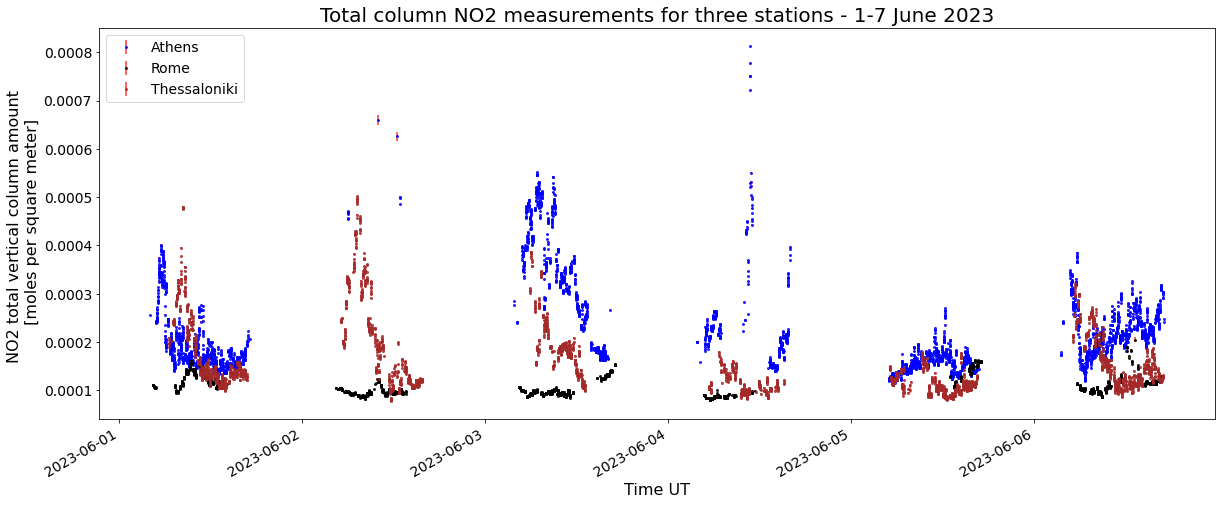

In [19]:
fig, ax = plt.subplots(figsize=(20,8))

ax.errorbar(athens_no2_summer.index, athens_no2_summer, yerr=athens_no2_err_summer,ecolor='r', label='Athens', alpha=0.8, color='blue', marker='.', linestyle='none', markersize=4 )
ax.errorbar(rome_no2_summer.index, rome_no2_summer, yerr=rome_no2_err_summer,ecolor='r', label='Rome', alpha=0.8, color='black', marker='.', linestyle='none', markersize=4 )
ax.errorbar(thessaloniki_no2_summer.index, thessaloniki_no2_summer, yerr=thessaloniki_no2_err_summer,ecolor='r', label='Thessaloniki', alpha=0.8, color='brown', marker='.', linestyle='none', markersize=4 )

plt.xlabel('Time UT', fontsize=16)
plt.ylabel('NO2 total vertical column amount \n [moles per square meter]', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.title('Total column NO2 measurements for three stations - 1-7 June 2023', fontsize=20)

fig.autofmt_xdate()
plt.show()

And now, let us repeat the plot for the week in December 2022:

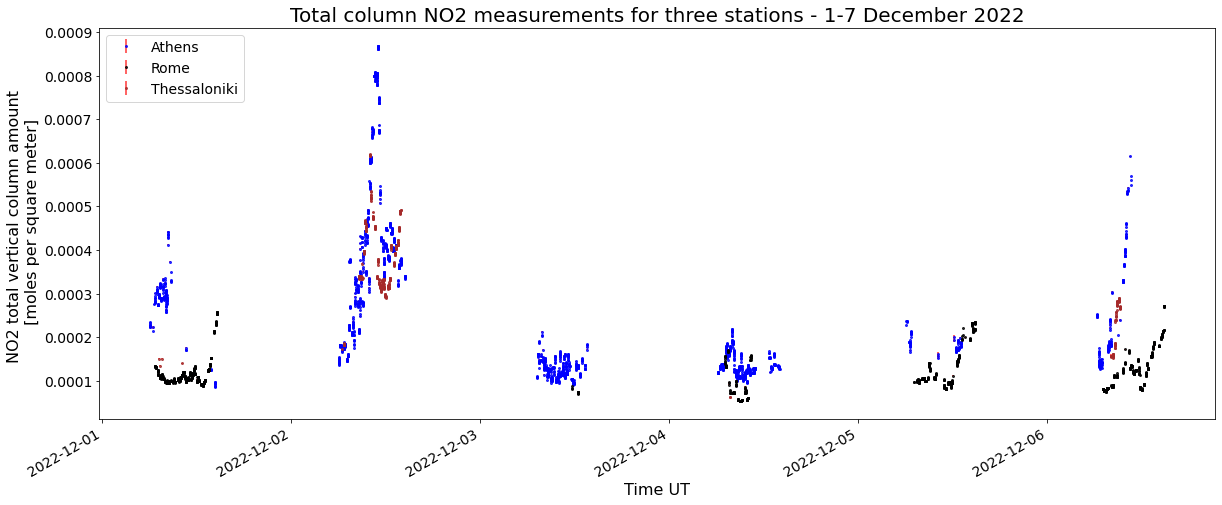

In [20]:
fig, ax = plt.subplots(figsize=(20,8))

ax.errorbar(athens_no2_winter.index, athens_no2_winter, yerr=athens_no2_err_winter,ecolor='r', label='Athens', alpha=0.8, color='blue', marker='.', linestyle='none', markersize=4 )
ax.errorbar(rome_no2_winter.index, rome_no2_winter, yerr=rome_no2_err_winter, ecolor='r', label='Rome', alpha=0.8, color='black', marker='.', linestyle='none', markersize=4 )
ax.errorbar(thessaloniki_no2_winter.index, thessaloniki_no2_winter, yerr=thessaloniki_no2_err_winter, ecolor='r', label='Thessaloniki', alpha=0.8, color='brown', marker='.', linestyle='none', markersize=4 )

plt.xlabel('Time UT', fontsize=16)
plt.ylabel('NO2 total vertical column amount \n [moles per square meter]', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.title('Total column NO2 measurements for three stations - 1-7 December 2022', fontsize=20)

fig.autofmt_xdate()
plt.show()

<br>

## <a id='interpret_med'></a>6. Interpret the plotting results &#127775;

  * Can you make a statement about the seasonal variations in NO<sub>2</sub> based on the Sentinel-5P data?
  * What do you observe about the diurnal cycle of NO<sub>2</sub> from the three Pandora stations?

<br>

<hr>

This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:left;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>

<img src='../img/footer.jpg' alt='Joint Training School Footer' align='left' width='100%'>